# Лабораторная работа №1

## Мамедова Лейла ПИ19-2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from matplotlib.lines import Line2D
%matplotlib inline

## 1.	Загрузите данные в ноутбук

In [2]:
data = pd.read_excel('Вариант 3.xlsx', skiprows=2)
data.head()

,№,№ школы,Класс,Пол,Номер варианта,Задания с кратким ответом,Задания с развёрнутым ответом,Устная часть,Первичный балл,Балл,Минимальный балл
0,1.0,152.0,11,М,333.0,----001---00---000--1-+0---,0(3)0(3)0(3)0(3)0(3),NaN,3.0,10.0,36.0
1,2.0,140.0,12,Ж,332.0,----100---01-+-000--0--1---,0(3)0(3)0(3)0(3)0(3),NaN,4.0,14.0,36.0
2,3.0,137.0,11,М,328.0,--+-010---00---101--0--1---,0(3)0(3)0(3)0(3)0(3),NaN,5.0,17.0,36.0
3,4.0,148.0,11,М,333.0,-+--000--+01---100--0--1---,0(3)0(3)0(3)0(3)0(3),NaN,5.0,17.0,36.0
4,5.0,153.0,11,Ж,333.0,-+--100---00---100-+0--1---,0(3)0(3)0(3)0(3)0(3),NaN,5.0,17.0,36.0


## 2.	Сделайте описательную статистику по среднему баллу

In [3]:
data['Балл'].describe()

count    1181.000000
mean       52.047458
std        14.959135
min        10.000000
25%        41.000000
50%        49.000000
75%        60.000000
max       100.000000
Name: Балл, dtype: float64

## 3.	Найдите процент учащихся, выполнивших работу ниже среднего

In [4]:
avg = data['Балл'].mean()
data[data['Балл'] < avg].count() * 100 / data.count()

№                                56.271186
№ школы                          56.271186
Класс                            56.271186
Пол                              56.271186
Номер варианта                   56.271186
Задания с кратким ответом        56.271186
Задания с развёрнутым ответом    56.271186
Устная часть                      0.000000
Первичный балл                   56.271186
Балл                             56.223539
Минимальный балл                 56.271186
dtype: float64

## 4.	Найти процент учащихся не сдавших экзамен

In [5]:
data[data['Балл'] < data['Минимальный балл']].count() * 100 / data.count()

№                                7.711864
№ школы                          7.711864
Класс                            7.711864
Пол                              7.711864
Номер варианта                   7.711864
Задания с кратким ответом        7.711864
Задания с развёрнутым ответом    7.711864
Устная часть                     0.000000
Первичный балл                   7.711864
Балл                             7.705334
Минимальный балл                 7.711864
dtype: float64

## 5.	Постройте круговую диаграмму, показывающую распределение сдавших и не сдавших экзамен

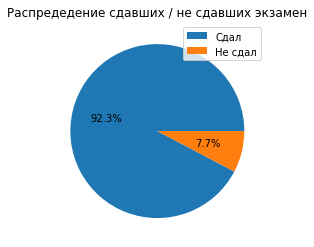

In [6]:
plt.title('Распредедение сдавших / не сдавших экзамен')
passed = data[data['Балл'] > 35]
failed = data[data['Балл'] <= 35]
plt.pie([passed.count()[0], failed.count()[0]], autopct='%1.1f%%')
plt.legend(["Сдал", "Не сдал"])

## 6.	Постройте гистограмму по распределению баллов за экзамен. Соответствует ли оно нормальному распределению?

<AxesSubplot:title={'center':'Гистограмма распределения баллов за экзамен'}, xlabel='Балл', ylabel='Количество'>

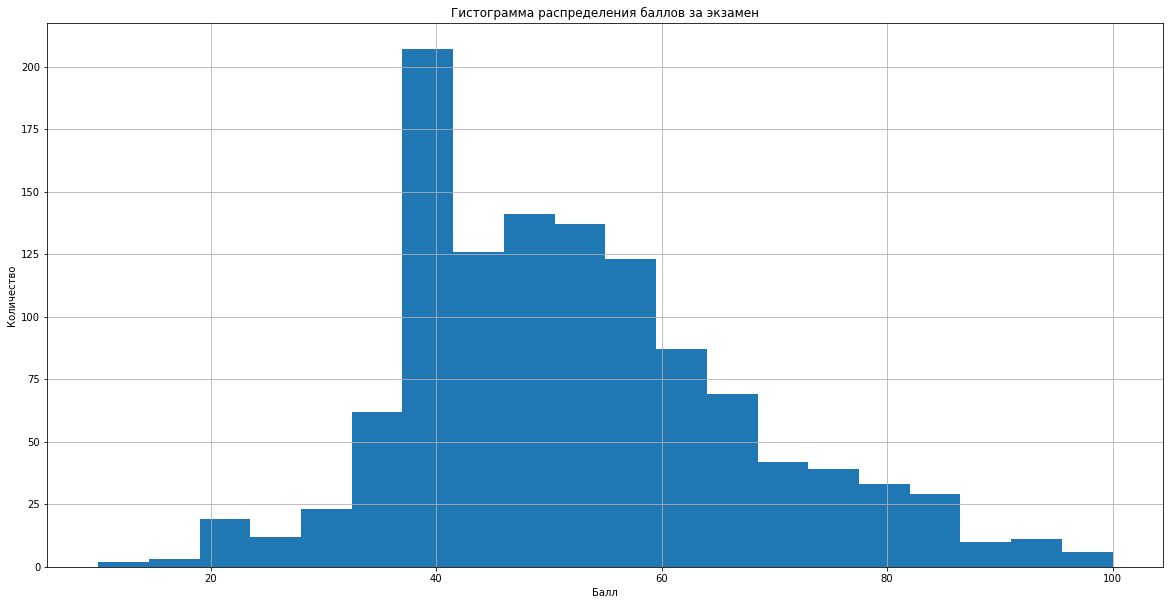

In [7]:
plt.figure(figsize=(20, 10))
plt.title('Гистограмма распределения баллов за экзамен')
plt.xlabel('Балл')
plt.ylabel('Количество')
data['Балл'].hist(bins=20)

__Нормальному распределению соответствует (есть скос слева)

## 7.	Постройте оценку ядерной плотности распределению баллов за экзамен

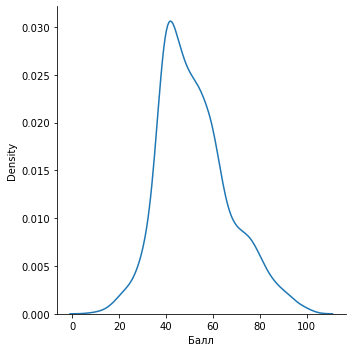

In [8]:
sns.displot(data['Балл'], kind='kde')

## 8.	Найдите процентное соотношение учащихся, сдавших экзамен на «отлично», «хорошо», «удовлетворительно», «неудовлетворительно». Сделайте графическое представление данного распределения

In [9]:
mark_2 = data[data['Балл']<=35]['Балл']
mark_3 = data[(data['Балл']>35) & (data['Балл']<=50)]['Балл'] 
mark_4 = data[(data['Балл']>50) & (data['Балл']<=75)]['Балл']
mark_5 = data[data['Балл']>=76]['Балл']

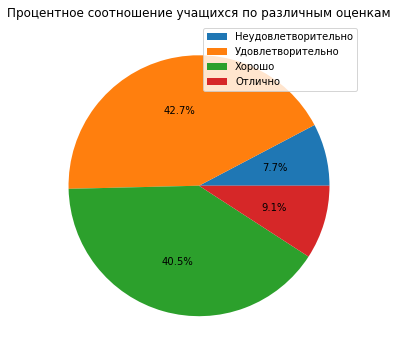

In [10]:
plt.figure(figsize=(16, 6))
plt.pie([mark_2.count(), mark_3.count(), mark_4.count(), mark_5.count()], autopct='%1.1f%%')
plt.title('Процентное соотношение учащихся по различным оценкам')
plt.legend(['Неудовлетворительно', 'Удовлетворительно', 'Хорошо', 'Отлично'])

## 9.	Постройте «ящиковые диаграммы», сравнивающие баллы учащихся, сдавших экзамен на «отлично», «хорошо», «удовлетворительно», «неудовлетворительно»

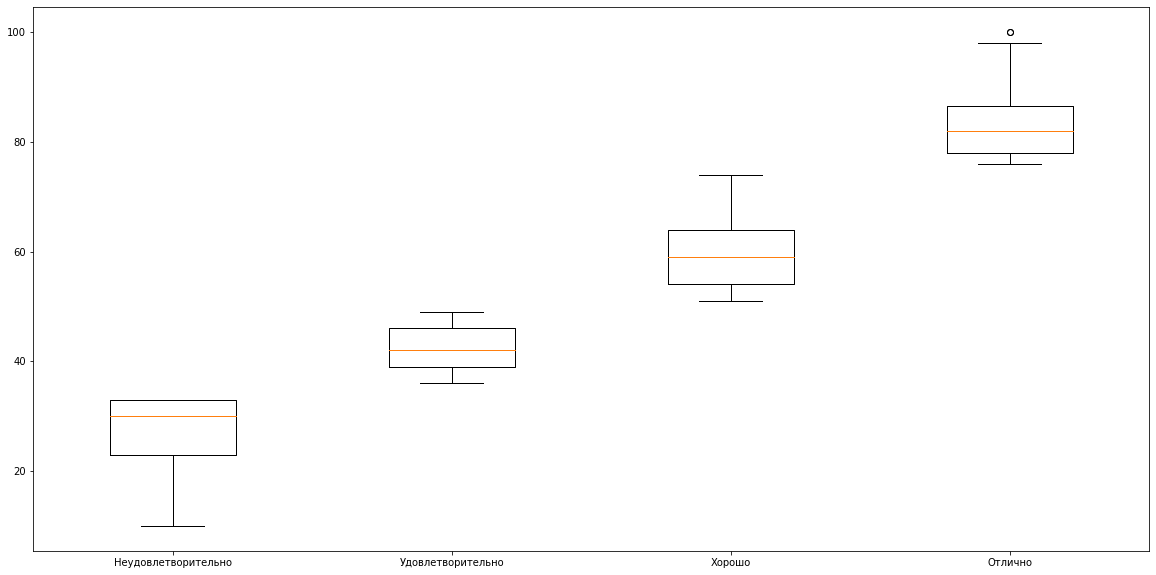

In [11]:
plt.figure(figsize=(20, 10))
a = plt.boxplot(x=[mark_2, mark_3, mark_4, mark_5], labels=['Неудовлетворительно', 'Удовлетворительно', 'Хорошо', 'Отлично'])

## 10. Какое процентное соотношение юношей и девушек писало данный экзамен? Представьте графически

In [12]:
data['Пол'].value_counts()

М    810
Ж    370
Name: Пол, dtype: int64

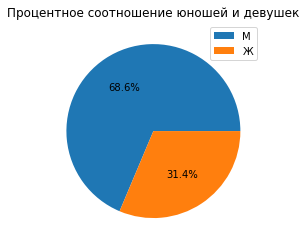

In [13]:
plt.pie([data['Пол'].value_counts()[0], data['Пол'].value_counts()[1]], autopct='%1.1f%%')
plt.legend(["М", "Ж"])
plt.title('Процентное соотношение юношей и девушек')
plt.show()

## 11.	Постройте диаграмму рассеивания, позволяющую увидеть средние баллы девушек и юношей

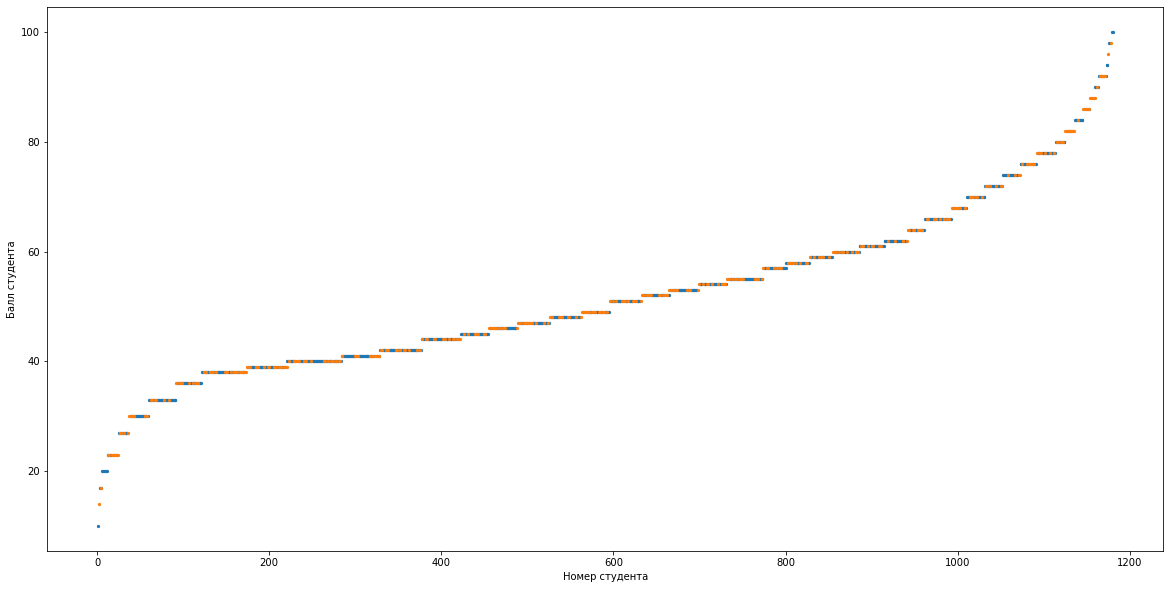

In [14]:
F = data[data["Пол"] == 'Ж']["Балл"]
F1 = data[data["Пол"] == 'Ж']["№"]
M = data[data["Пол"] == 'М']["Балл"]
M1 = data[data["Пол"] == 'М']["№"]

fig, ax = plt.subplots(figsize=(10, 6))
width = 5
ax.scatter(M1, M, width)
ax.scatter(F1, F, width)
plt.xlabel("Номер студента")
plt.ylabel("Балл студента")
fig.set_size_inches(20, 10)
plt.show()

## 12.	Сколько школ (код ППЕ) принимало участие в экзамене?

In [15]:
schools = data['№ школы'].unique().shape[0] - 1 #т.к. одна шокла nan
print(f'В экзамене принимало участие {schools} школ.')

В экзамене принимало участие 19 школ.


## 13.	Постройте диаграмму, позволяющую сравнить средние баллы за экзамен по школам. Если какие-нибудь выбросы?

<AxesSubplot:xlabel='№ школы', ylabel='Балл'>

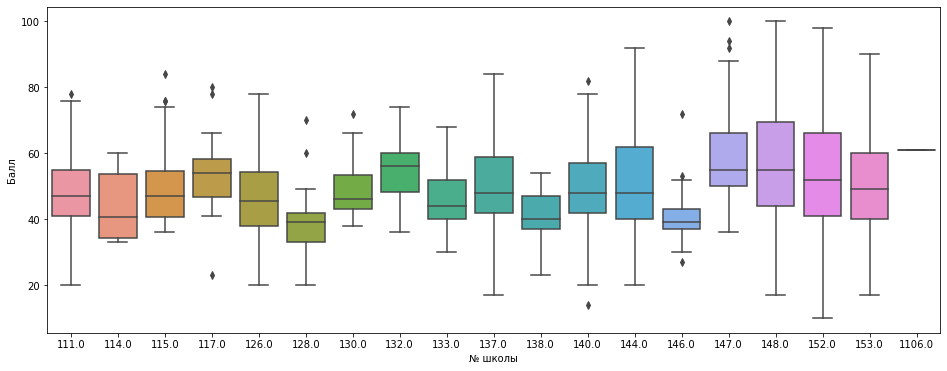

In [16]:
plt.figure(figsize=(16, 6))
sns.boxplot(x=data['№ школы'], y=data['Балл'])

Да, выбросы имеются, например в 117 школе сильно выделяется ученик, набравший 22(?) балла. В других школах также имеются выбросы

# __Повышенной сложности:__

## 1.	Сколько всего заданий с кратким ответом? С развернутым ответом?

In [17]:
short_answ = len(data['Задания с кратким ответом'][0])
long_answ = len(data['Задания с развёрнутым ответом'][0].split('(3)')) - 1
print(f'Заданий с кратким ответом - {short_answ}.')
print(f'Заданий с развёрнутым ответом - {long_answ}.')

Заданий с кратким ответом - 27.
Заданий с развёрнутым ответом - 5.


## 2.	Пусть задания с кратким ответом будут задания типа В. Соответственно всего по экзамену вопросов класса В: В1 … Вк  Посчитайте процент выполненных и невыполненных заданий по каждому вопросу класса В. Постройте гистограмму, позволяю щую увидеть данное распределение. Какие есть выпады по данному распределению?

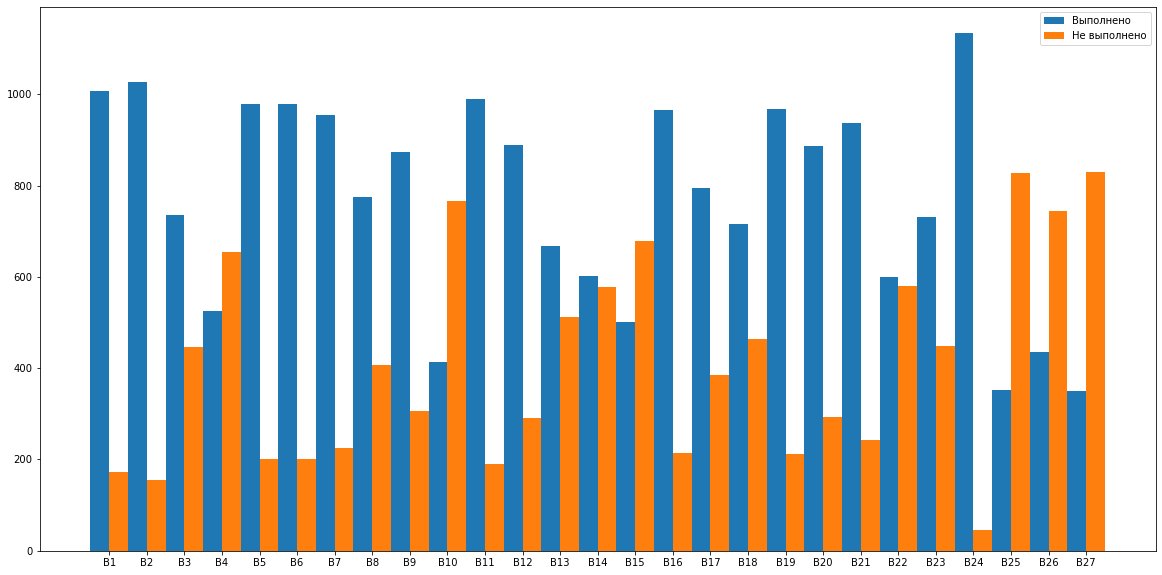

In [18]:
failed = [0]*27
passed = [0]*27
for row in data["Задания с кратким ответом"]:
    for i, el in enumerate(str(row)):
        if el =="0" or el=="-":
            failed[i] += 1
        else:
            passed[i] += 1
            
ex = [f"B{i}" for i in range(1, 28)]
width = 0.5
x = np.arange(len(ex))

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, passed, width, label='Выполнено')
rects2 = ax.bar(x + width/2, failed, width, label='Не выполнено')
ax.set_xticks(x)
ax.set_xticklabels(ex)
ax.legend()
fig.set_size_inches(20, 10)

Из явных выпадов видно, что с заданием B24 справилось подавляющее большинство сдававших

## 3.	Аналогично и с типом С (ответы с развернутым ответом)

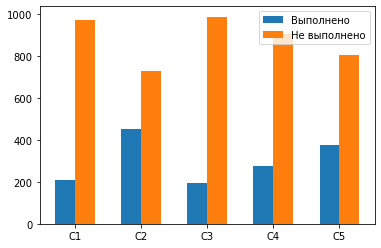

In [19]:
failed = [0]*5
passed = [0]*5
for row in data["Задания с развёрнутым ответом"]:
    for i, el in enumerate(str(row).split('(3)')):
        if el =="0":
            failed[i] += 1
        elif el =="1" or el =="2" or el =="3":
            passed[i] += 1
            
ex = [f"C{i}" for i in range(1, 6)]
width = 0.3
x = np.arange(len(ex))

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, passed, width, label='Выполнено')
rects2 = ax.bar(x + width/2, failed, width, label='Не выполнено')
ax.set_xticks(x)
ax.set_xticklabels(ex)
ax.legend()

Явных выпадов не видно, но можно заметить, что с C2 справляется больше людей, чем с остальными задачами

## 4.	Сделайте анализ по двум школам:
* А) по всем выполненным заданиям типа В
* Б) по заданиям типа С больше 50%
* В) по среднему балу юношей и девушек


In [21]:
first_school, second_school = 140, 153

first_school_lst = [0]*27
second_school_lst = [0]*27
for row in data[data["№ школы"] == first_school]["Задания с кратким ответом"]:
    for i, el in enumerate(str(row)):
        if el =="0" or el=="-":
            pass
        else:
            first_school_lst[i] += 1
            
for row in data[data["№ школы"] == second_school]["Задания с кратким ответом"]:
    for i, el in enumerate(str(row)):
        if el =="0" or el=="-":
            pass
        else:
            second_school_lst[i] += 1

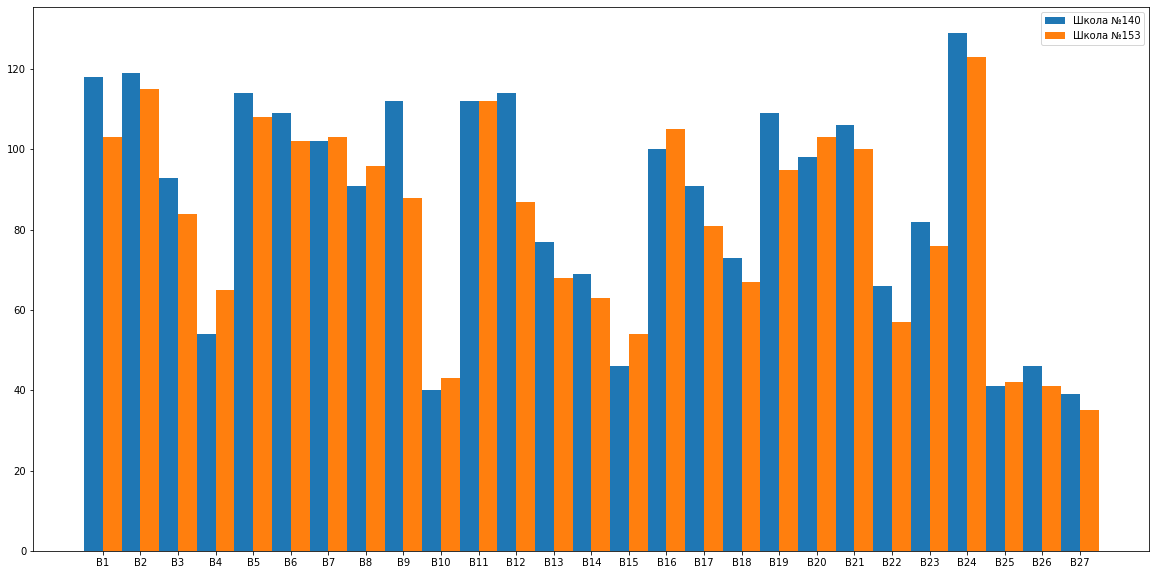

In [22]:
ex = [f"B{i}" for i in range(1, 28)]
width = 0.5
x = np.arange(len(ex))

first_school_label = 'Школа №' + str(first_school)
second_school_label = 'Школа №' + str(second_school)
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, first_school_lst, width, label=first_school_label)
rects2 = ax.bar(x + width/2, second_school_lst, width, label=second_school_label)
ax.set_xticks(x)
ax.set_xticklabels(ex)
ax.legend()
fig.set_size_inches(20, 10)

### Б) по заданиям типа С больше 50%

In [23]:
first_school_lst = [0]*5
second_school_lst = [0]*5
for row in data[data["№ школы"] == first_school]["Задания с развёрнутым ответом"]:
    for i, el in enumerate(str(row).split('(3)')):
        if el =="2" or el=="3":
            first_school_lst[i] += 1
            
for row in data[data["№ школы"] == second_school]["Задания с развёрнутым ответом"]:
    for i, el in enumerate(str(row).split('(3)')):
        if el =="2" or el=="3":
            second_school_lst[i] += 1

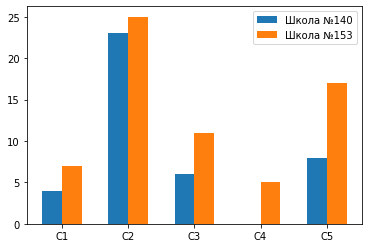

In [24]:
ex = [f"C{i}" for i in range(1, 6)]
width = 0.3
x = np.arange(len(ex))

first_school_label = 'Школа №' + str(first_school)
second_school_label = 'Школа №' + str(second_school)
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, first_school_lst, width, label=first_school_label)
rects2 = ax.bar(x + width/2, second_school_lst, width, label=second_school_label)
ax.set_xticks(x)
ax.set_xticklabels(ex)
ax.legend()

В школе №140 никто не решил С4 более, чем на 50%

### в) по среднему балу юношей и девушек

In [25]:
F = [data[(data["№ школы"] == first_school) & (data["Пол"] == 'Ж')]["Балл"].mean(), data[(data["№ школы"] == second_school) & (data["Пол"] == 'Ж')]["Балл"].mean()]
M = [data[(data["№ школы"] == first_school) & (data["Пол"] == 'М')]["Балл"].mean(), data[(data["№ школы"] == second_school) & (data["Пол"] == 'М')]["Балл"].mean()]

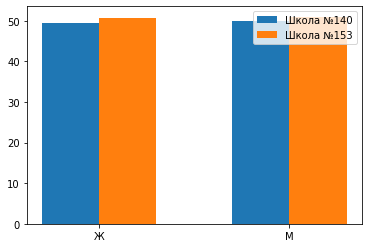

In [26]:
ex = ['Ж', 'М']
width = 0.3
x = np.arange(len(ex))

first_school_label = 'Школа №' + str(first_school)
second_school_label = 'Школа №' + str(second_school)
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, F, width, label=first_school_label)
rects2 = ax.bar(x + width/2, M, width, label=second_school_label)
ax.set_xticks(x)
ax.set_xticklabels(ex)
ax.legend()